#### Devi Mahajan
#### 15.1.25
# Week 1 Stationarity and Random Walk
***

In [102]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import random
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller, kpss

In [9]:
file_path = '/Users/Devyani/msads/timeseries/hw1_data.csv' 
data = pd.read_csv(file_path)

### 1: Stationarity
***

#### A: 10 pts Task: Perform EDA on the dataset. Include both quantitative and qualitative descriptions. Check for missing data and correlations.

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

In [23]:
def perform_eda(data):
    print("Missing Data:\n", data.isnull().sum())
    print("\nSummary Statistics:\n", data.describe())
    print("\nCorrelation Matrix:\n", data[['IWM', 'QQQ', 'SPY']].corr())
    print("\nColumn Names:\n",data.columns.tolist())

In [25]:
perform_eda(data)

Missing Data:
 Date    0
IWM     0
QQQ     0
SPY     0
dtype: int64

Summary Statistics:
                                 Date          IWM          QQQ          SPY
count                           4972  4972.000000  4972.000000  4972.000000
mean   2010-04-16 01:02:33.499597568    77.254619    70.539066   134.360431
min              2000-05-26 00:00:00    25.456144    17.459492    53.503864
25%              2005-05-09 18:00:00    46.092833    34.344567    85.923027
50%              2010-04-17 12:00:00    63.785954    48.595505   105.741215
75%              2015-03-25 06:00:00   106.390139    99.085045   180.474552
max              2020-03-03 00:00:00   167.320114   235.638428   332.137360
std                              NaN    38.722995    49.057235    66.778492

Correlation Matrix:
           IWM       QQQ       SPY
IWM  1.000000  0.950877  0.982987
QQQ  0.950877  1.000000  0.986423
SPY  0.982987  0.986423  1.000000

Column Names:
 ['Date', 'IWM', 'QQQ', 'SPY']



#### B: 5 pts Concept: Describe the data. Do you expect this data to be stationary? Do you expect this data to be a random walk?

These series are likely non-stationary due to trends and possible seasonality in financial indices data; the prices of financial indices tend to increase over time or follow trends, which violates stationarity. We can expect this data to be a random walk (in the short term) because financial time series data tends to lack predictable trends over shorter time periods, but other contributing economic factors could make it such that this data is not a pure random walk.

#### C: 10 pts Task: Create a function that returns the stationarity test results from both ADF and KPSS tests

In [35]:
def stationarity_tests(series, significance=0.05):
    #adf
    adf_result = adfuller(series, autolag='AIC')
    adf_stationary = adf_result[1] < significance 

    #kpss
    kpss_result = kpss(series, regression='c', nlags='auto')
    kpss_stationary = kpss_result[1] > significance
    
    return {
        'ADF Test Statistic': adf_result[0],
        'ADF p-value': adf_result[1],
        'ADF Stationary': adf_stationary,
        'KPSS Test Statistic': kpss_result[0],
        'KPSS p-value': kpss_result[1],
        'KPSS Stationary': kpss_stationary,
    }

#### D: 5 pts Task: Use the function to test if each series is stationary. Return results from both ADF and KPSS tests for all three time series

In [39]:
stationarity_results = {
    'IWM': stationarity_tests(data['IWM']),
    'QQQ': stationarity_tests(data['QQQ']),
    'SPY': stationarity_tests(data['SPY']),
}

print("\nStationarity Test Results:")
for key, value in stationarity_results.items():
    print(f"{key}: {value}")

/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_7432/1024662353.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')
/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_7432/1024662353.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')



Stationarity Test Results:
IWM: {'ADF Test Statistic': -0.1480962532936984, 'ADF p-value': 0.9444322092144998, 'ADF Stationary': False, 'KPSS Test Statistic': 10.131982676937758, 'KPSS p-value': 0.01, 'KPSS Stationary': False}
QQQ: {'ADF Test Statistic': 2.5259826463778583, 'ADF p-value': 0.9990577527752149, 'ADF Stationary': False, 'KPSS Test Statistic': 8.76762359212516, 'KPSS p-value': 0.01, 'KPSS Stationary': False}
SPY: {'ADF Test Statistic': 1.5752062199520143, 'ADF p-value': 0.9977812527105555, 'ADF Stationary': False, 'KPSS Test Statistic': 9.349530997962862, 'KPSS p-value': 0.01, 'KPSS Stationary': False}


/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_7432/1024662353.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


#### E: 5 pts Task: Difference the three time series and return stationarity results from both ADF and KPSS tests

In [42]:
differenced_data = data[['IWM', 'QQQ', 'SPY']].diff().dropna()

In [46]:
differenced_stationarity_results = {
    'IWM': stationarity_tests(differenced_data['IWM']),
    'QQQ': stationarity_tests(differenced_data['QQQ']),
    'SPY': stationarity_tests(differenced_data['SPY']),
}
print("\nDifferenced Stationarity Results:")
for key, value in differenced_stationarity_results.items():
    print(f"{key}: {value}")

/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_7432/1024662353.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')
/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_7432/1024662353.py:7: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')



Differenced Stationarity Results:
IWM: {'ADF Test Statistic': -16.918990310417147, 'ADF p-value': 9.973515713272531e-30, 'ADF Stationary': True, 'KPSS Test Statistic': 0.08709037809055029, 'KPSS p-value': 0.1, 'KPSS Stationary': True}
QQQ: {'ADF Test Statistic': -12.637759376200735, 'ADF p-value': 1.4573228142360288e-23, 'ADF Stationary': True, 'KPSS Test Statistic': 1.0827345139182143, 'KPSS p-value': 0.01, 'KPSS Stationary': False}
SPY: {'ADF Test Statistic': -16.838863923088905, 'ADF p-value': 1.1423431756876591e-29, 'ADF Stationary': True, 'KPSS Test Statistic': 0.5437260660414761, 'KPSS p-value': 0.031818453594262136, 'KPSS Stationary': False}


#### F: 10 pts Concept: In general, explain how you can get different stationarity results from the two tests. 

The ADF test assumes a non-stationary null hypothesis while the KPSS test assumes a stationary (around a deterministic trend) null hypothesis. The ADF test is more sensitive to unit root process and the KPSS test is sensitive to deterministic trends. Nonetheless, the tests are designed to be complimentary and the results, when analysed in tandem, provide valuable insights about the series.

#### G: 5 pts Concept: What does trend stationary mean?

It is a stochastic process wherein the underlying trend can be removed, leaving a stationary process. It differs from random walk in that where shocks have a permanent effect on random walks and other unit-root processes, trend stationary processes can return to their deterministic trends over time, and shocks have a temporary effect.

### 2: Random Walk
***

#### A: 5 pts Task: Using random.sample create a sample with length 1000 of 1 if >=0.5 and -1 if less than 0.5

In [77]:
random_values = random.sample([random.uniform(0, 1) for _ in range(1000)], k=1000)
random_walk_steps = [1 if value >= 0.5 else -1 for value in random_values]

#### B: 5 pts Task: Use cumulative sum to create movement

In [79]:
random_walk = np.cumsum(random_walk_steps)

#### C: 5 pts Concept: Describe which of the two series (2a or 2b) is a random walk, why? What is the other series?

The series generated in B is a random walk because it is the cumulative value of the steps generated in A, where each step is independent and the value changes in increments of 1, which is indicative of a random walk. It does not have a predictable pattern and future moves are entirely determined by the current step. The series in A is a sequence of random steps, and it is not a random walk as it is not cumulative.

#### D: 5 pts Task: Create two plots of the random walk time series, use .plot() and use autocorrelation_plot()

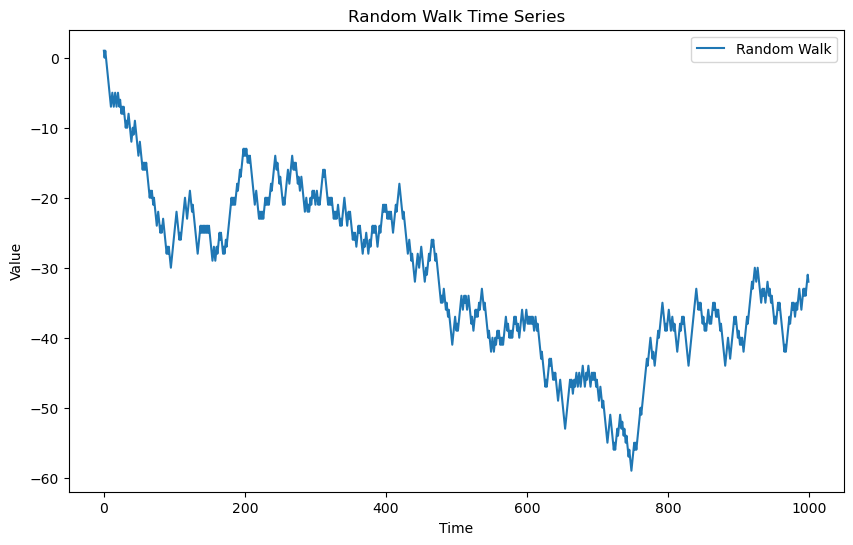

In [88]:
plt.figure(figsize=(10, 6))
plt.plot(random_walk, label='Random Walk')
plt.title('Random Walk Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

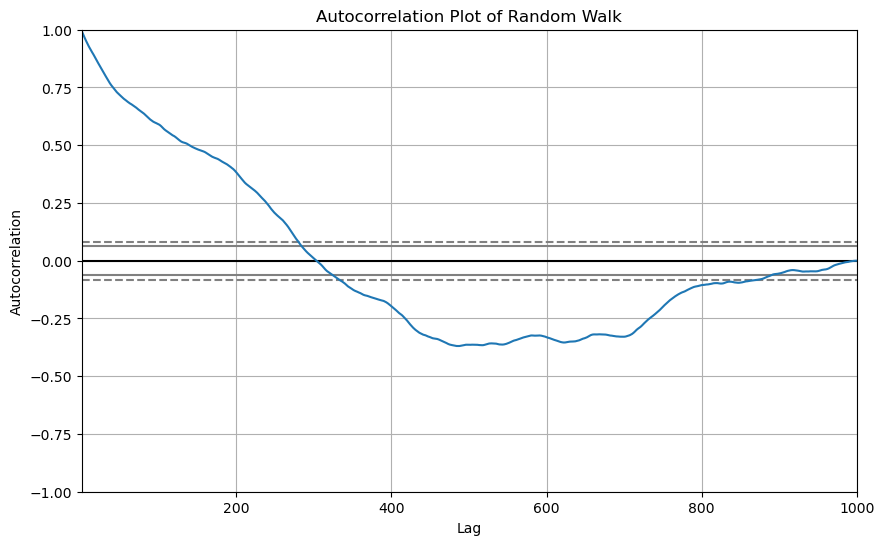

In [104]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(random_walk)
plt.title('Autocorrelation Plot of Random Walk')
plt.show()

#### E: 10 pts Concept: Is the random walk stationary? Defend using quantitative tests.

In [92]:
def moretests(series, significance=0.05):
    #adf
    adf_result = adfuller(series, autolag='AIC')
    adf_stationary = adf_result[1] < significance

    #kpss
    try:
        kpss_result = kpss(series, regression='c', nlags='auto')
        kpss_stationary = kpss_result[1] > significance
    except ValueError:
        kpss_result = [None, None]
        kpss_stationary = False

    return {
        'ADF Test Statistic': adf_result[0],
        'ADF p-value': adf_result[1],
        'ADF Stationary': adf_stationary,
        'KPSS Test Statistic': kpss_result[0],
        'KPSS p-value': kpss_result[1],
        'KPSS Stationary': kpss_stationary,
    }

In [94]:
stationarity_results = moretests(random_walk)
print("Random Walk Stationarity Results:")
print(stationarity_results)

Random Walk Stationarity Results:
{'ADF Test Statistic': -2.7784711394449215, 'ADF p-value': 0.06141542661036399, 'ADF Stationary': False, 'KPSS Test Statistic': 3.652697621788287, 'KPSS p-value': 0.01, 'KPSS Stationary': False}


/var/folders/tp/65gd6xdd44xf84np6mcj1w480000gp/T/ipykernel_7432/4051991178.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(series, regression='c', nlags='auto')


As shown by the KPSS and ADF tests run above, these results show that a random walk is **not stationary**. A random walk's variance increases over time and its observations are not dependent on time, which violates the definition of stationarity.

#### F: 5 pts Task: Difference the data and show the autocorrelation plot

In [96]:
differenced_random_walk = np.diff(random_walk)

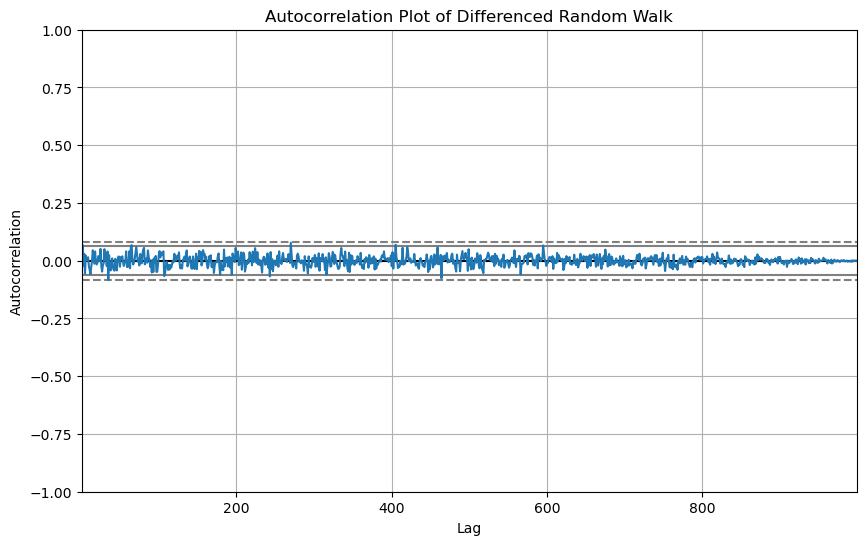

In [108]:
plt.figure(figsize=(10, 6))
autocorrelation_plot(pd.Series(differenced_random_walk))
plt.title('Autocorrelation Plot of Differenced Random Walk')
plt.show()

#### G: 10 pts Concept: What is the significance of this correlation plot?

The plot shows the absence of long-term dependencies after differencing, which suggests that the differenced series is stationary. This demonstrates how differencing a random walk removes the trend, with this plot showing how the series behaves without the influence of previous values.

#### H: 5 pts Concept: Can a random walk be predicted? Why or why not?

A random walk **cannot** be predicted. By definition, the movements of a random walk are random and each movement does not have an underlying deterministic pattern, and is instead dependent on a random decision at each step. Future values do not depend on past values, which means there is no trend to forecast.